<a href="https://colab.research.google.com/github/utkarshg1/Test/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering
Unsupervised Machine Learning Target feature is not available.
Main goal to categorize similar data points togethor

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Install the required packages

In [2]:
%pip install yellowbrick plotly nbformat

### Read the dataset

In [3]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Categorize similar customers based on Age, Income and Spend

### Step 1 : Seperate X value (Age, Income, Spend)

In [5]:
X = df[['Age', 'Income', 'Spending']]
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Step 2 : Apply Preprocessing on X

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [7]:
num_pipe = Pipeline([('impute', SimpleImputer(strategy='median')),
                     ('scaler', StandardScaler())]).set_output(transform='pandas')

In [8]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Step 3: Find out optimum number of clusters using elbow method

In [9]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

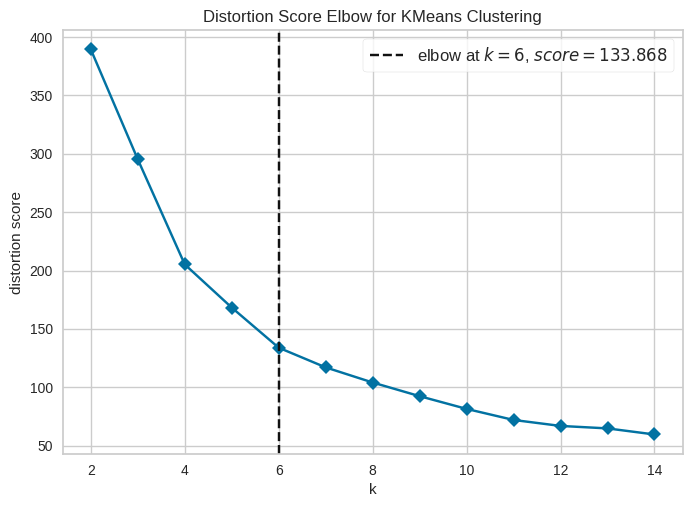

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
visualizer = KElbowVisualizer(KMeans(),
                              k=(2, 15),
                              timings=False)
visualizer.fit(X_pre)
visualizer.show()

### Create KMeans algorithm at k=6 as elbow is found at k=6 from above graph

In [13]:
model1 = KMeans(n_clusters=6)
lab1 = model1.fit_predict(X_pre)

In [14]:
lab1

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 5, 1, 0, 4,
       0, 1, 5, 4, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4,
       5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 4,
       4, 5, 5, 4, 5, 4, 4, 4, 5, 4, 5, 4, 4, 5, 5, 4, 5, 4, 5, 5, 5, 5,
       5, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 2, 4, 2, 3, 2, 3, 2, 3, 2,
       4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 5, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [15]:
X2 = X.copy()

In [16]:
X2

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [17]:
X2["Label1"] = lab1
X2

,Age,Income,Spending,Label1
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,1
4,31,17,40,0
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [18]:
X2[X2['Label1']==0]

,Age,Income,Spending,Label1
2,20,16,6,0
4,31,17,40,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0


In [19]:
for i in range(6):
  print(f'Cluster number : {i}\n')
  display(X2[X2['Label1']==i])
  print('\n==================================\n')

Cluster number : 0



,Age,Income,Spending,Label1
2,20,16,6,0
4,31,17,40,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0




Cluster number : 1



,Age,Income,Spending,Label1
0,19,15,39,1
1,21,15,81,1
3,23,16,77,1
5,22,17,76,1
7,23,18,94,1
9,30,19,72,1
11,35,19,99,1
13,24,20,77,1
15,22,20,79,1
17,20,21,66,1




Cluster number : 2



,Age,Income,Spending,Label1
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Cluster number : 3



,Age,Income,Spending,Label1
126,43,71,35,3
128,59,71,11,3
130,47,71,9,3
134,20,73,5,3
136,44,73,7,3
138,19,74,10,3
140,57,75,5,3
144,25,77,12,3
146,48,77,36,3
148,34,78,22,3




Cluster number : 4



,Age,Income,Spending,Label1
43,31,39,61,4
47,27,40,47,4
48,29,40,42,4
49,31,40,42,4
51,33,42,60,4
52,31,43,54,4
58,27,46,51,4
61,19,46,55,4
65,18,48,59,4
68,19,48,59,4




Cluster number : 5



,Age,Income,Spending,Label1
40,65,38,35,5
46,50,40,55,5
50,49,42,52,5
53,59,43,60,5
54,50,43,45,5
55,47,43,41,5
56,51,44,50,5
57,69,44,46,5
59,53,46,46,5
60,70,46,56,5


In [20]:
cent1 = X2.groupby(by='Label1').mean()

In [21]:
cent1

,Age,Income,Spending
Label1,,,
0,45.523810,26.285714,19.380952
1,25.000000,25.260870,77.608696
2,32.692308,86.538462,82.128205
3,41.264706,88.500000,16.764706
4,27.000000,56.657895,49.131579
5,56.333333,54.266667,49.066667


### Visualize above with plotly

In [22]:
import plotly.express as px
fig1 = px.scatter_3d(data_frame = X2,
                     x='Age',
                     y='Income',
                     z='Spending',
                     color='Label1')
fig1.show()

# KMeans clustering completed

# 2. Agglomerative CLustering (Hierarchial clustering)

In [23]:
X_pre

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [24]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=6)
lab2 = model2.fit_predict(X_pre)

In [25]:
lab2

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [26]:
X3 = X.copy()

In [27]:
X3

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [28]:
X3['Label2'] = lab2

In [29]:
X3

,Age,Income,Spending,Label2
0,19,15,39,4
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [30]:
for i in range(6):
  print(f'Cluster number : {i}\n')
  display(X3[X3['Label2']==i])
  print('\n============================================\n')

Cluster number : 0



,Age,Income,Spending,Label2
27,35,28,61,0
43,31,39,61,0
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0
51,33,42,60,0
52,31,43,54,0
58,27,46,51,0
61,19,46,55,0
65,18,48,59,0




Cluster number : 1



,Age,Income,Spending,Label2
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1




Cluster number : 2



,Age,Income,Spending,Label2
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Cluster number : 3



,Age,Income,Spending,Label2
128,59,71,11,3
130,47,71,9,3
136,44,73,7,3
140,57,75,5,3
148,34,78,22,3
150,43,78,17,3
152,44,78,20,3
154,47,78,16,3
156,37,78,1,3
158,34,78,1,3




Cluster number : 4



,Age,Income,Spending,Label2
0,19,15,39,4
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4




Cluster number : 5



,Age,Income,Spending,Label2
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5
19,35,23,98,5


In [31]:
fig2 = px.scatter_3d(data_frame=X3,
                     x='Age',
                     y='Income',
                     z='Spending',
                     color='Label2')
fig2.show()